Realizar histogram matching de acuerdo a:

https://github.com/CONABIO/antares3/blob/training-data-model-fit/madmex/lcc/bitemporal/distance.py#L5

# 1

Registrar productos de surfaces reflectances del año 95-96 (algunas escenas) disponibles en s3.

Se eligió el dc tile: (21,-19) definido de acuerdo al tiling en los archivos de configuración del satélite landsat de antares3.

Este dc tile corresponde al path/row: 032 042 (Durango) y de las escenas que están disponibles en s3 para el año 95-96 están:

LT050320421995020601T1-SC20180529121712/
LT050320421995031001T1-SC20180529121554/
LT050320421995041101T1-SC20180529121727/
LT050320421995051301T1-SC20180529121345/
LT050320421995100401T1-SC20180529121414/
LT050320421995102001T1-SC20180529120628/
LT050320421995112101T1-SC20180529121834/
LT050320421996010801T2-SC20180529123117/
LT050320421996012401T2-SC20180529122022/
LT050320421996031201T1-SC20180529122036/
LT050320421996041301T1-SC20180529121850/
LT050320421996042901T1-SC20180529121810/
LT050320421996051501T1-SC20180529122435/
LT050320421996102201T1-SC20180529123018/
LT050320421996110701T1-SC20180529122414/
LT050320421996112301T1-SC20180529121903/

Se eligen registrar:

LT050320421995020601T1-SC20180529121712/
LT050320421995031001T1-SC20180529121554/
LT050320421995112101T1-SC20180529121834/
LT050320421996012401T2-SC20180529122022/
LT050320421996031201T1-SC20180529122036/
LT050320421996110701T1-SC20180529122414/
LT050320421996112301T1-SC20180529121903/

y se copian a :

```
/LUSTRE/MADMEX/tasks/2019_tasks/histogram_matching/scenes_95_96/

/shared_volume/tasks/2019_tasks/histogram_matching/scenes_95_96/
```

Pasos de prepare, product add, dataset add e ingest:


```
antares prepare_metadata --path /shared_volume/tasks/2019_tasks/histogram_matching/scenes_95_96/ --dataset_name landsat_espa --outfile metadata_mex_l5.yaml -sc /shared_volume/scheduler.json

datacube -v product add ~/.config/madmex/indexing/ls5_espa_scenes.yaml

datacube -v dataset add metadata_mex_l5.yaml

datacube -v ingest -c ~/.config/madmex/ingestion/ls5_espa_mexico.yaml --executor distributed 172.17.0.2:8786
```


Check via cmd line

datacube product list

```
ls5_espa_mexico Landsat 5 Collection 1 processed to surface reflectance by espa. Resampled to 30m Mexico INEGI Lambert Conformal Conic projection with a 50 km tile size.
ls5_espa_scene  Landsat 5 Collection 1 Higher Level SR scene processed by ESPA. 30m UTM based projection.
```

# 2

Registrar los productos de las recetas (dc tile: (21,-19) para años 2014-2015) de acuerdo al notebook:

https://github.com/CONABIO/antares3-sandbox/blob/master/notebooks/ingest_recipe_products/ingest_recipe_products.ipynb

# 3 histogram matching

Uso de: https://github.com/CONABIO/antares3/blob/training-data-model-fit/madmex/lcc/bitemporal/distance.py#L5

Referencias:

https://github.com/mapbox/rio-hist

https://blog.mapbox.com/color-balancing-imagery-with-histogram-matching-be1b38c28509


## A) Cargar producto de años `source` (1995-1996)

In [1]:
%matplotlib inline
import matplotlib
from datacube.api import GridWorkflow

from madmex.wrappers import gwf_query
from madmex.util import join_dicts

209.00498723983765
2019-08-02 22:05:17,521 - madmex.wrappers - loggerwriter write: 209.00498723983765


In [2]:
product = ['ls5_espa_mexico']
begin = '1995-01-01'
end = '1996-12-31'
region = 'Durango'
gwf_kwargs = {'region': region, 'begin': begin, 'end': end}
dc_tile=(21,-19)
dict_list=[]

In [3]:
for prod in product:
    gwf_kwargs.update(product = prod)
    try:
        dict_list.append(gwf_query(**gwf_kwargs, view=False))
    # Exception is in case one of the product hasn't been registered in the datacube
    except Exception as e:
        pass
iterable = join_dicts(*dict_list, join='full').items()

In [4]:
lista_iter = list(iterable)

In [5]:
index = [x for x in range(0,len(lista_iter)) if lista_iter[x][0] == dc_tile]

In [6]:
var_source = lista_iter[index[0]]

In [7]:
var_source

((21, -19), [Tile<sources=<xarray.DataArray (time: 7)>
  array([(Dataset <id=979bee9a-40f0-4e12-bd21-86d0d2db3087 type=ls5_espa_mexico location=file:///shared_volume/datacube/datacube_ingest/LS5_espa/mexico/LS5_espa_21_-19_19950206164648000000.nc>,),
         (Dataset <id=4c9a2386-597c-405c-bbd9-f076e077ff71 type=ls5_espa_mexico location=file:///shared_volume/datacube/datacube_ingest/LS5_espa/mexico/LS5_espa_21_-19_19950310164531000000.nc>,),
         (Dataset <id=b817293f-7dda-48a8-a7d6-1a95dee6ab6d type=ls5_espa_mexico location=file:///shared_volume/datacube/datacube_ingest/LS5_espa/mexico/LS5_espa_21_-19_19951121163445000000.nc>,),
         (Dataset <id=37a54d8c-88e4-4883-8e41-d02830400be5 type=ls5_espa_mexico location=file:///shared_volume/datacube/datacube_ingest/LS5_espa/mexico/LS5_espa_21_-19_19960124163902000000.nc>,),
         (Dataset <id=98f4c96b-fbd2-4441-8195-6529852872df type=ls5_espa_mexico location=file:///shared_volume/datacube/datacube_ingest/LS5_espa/mexico/LS5_espa_

## B) Cargar producto de años `template` (2014-2015)

In [8]:
import xarray as xr

In [9]:
product = ['recipe_mex_L7L8_1415']
begin = '2014-01-01'
end = '2015-12-31'
region = 'Durango'
gwf_kwargs = {'region': region,  'begin': begin, 'end': end}
dc_tile=(21,-19)
dict_list=[]

In [10]:
for prod in product:
    gwf_kwargs.update(product = prod)
    try:
        dict_list.append(gwf_query(**gwf_kwargs, view=False))
    # Exception is in case one of the product hasn't been registered in the datacube
    except Exception as e:
        pass
iterable = join_dicts(*dict_list, join='full').items()

In [11]:
lista_iter_template = list(iterable)

In [12]:
index_template = [x for x in range(0,len(lista_iter_template)) if lista_iter_template[x][0] == dc_tile]

In [13]:
var_template = lista_iter_template[index_template[0]]

In [14]:
var_template

((21, -19), [Tile<sources=<xarray.DataArray (time: 1)>
  array([(Dataset <id=68d0425b-0a05-5455-a0f4-2bb2029abb86 type=recipe_mex_L7L8_1415 location=file://shared_volume/datacube/datacube_ingest/recipes/recipe_mex_L7L8_1415/madmex_003_21_-19_2014-12-31.nc>,)],
        dtype=object)
  Coordinates:
    * time     (time) datetime64[ns] 2014-12-31T12:00:00,
  	geobox=GeoBox(1667, 1667, Affine(30.0, 0.0, 2027370.0,
         0.0, -30.0, 1526540.0), PROJCS["unnamed",GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS84",6378137,6556752.3141]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["standard_parallel_1",17.5],PARAMETER["standard_parallel_2",29.5],PARAMETER["latitude_of_origin",12],PARAMETER["central_meridian",-102],PARAMETER["false_easting",2500000],PARAMETER["false_northing",0]])>])

In [15]:
sr_template = xr.auto_combine([GridWorkflow.load(x, dask_chunks={'x': 600, 'y': 600},
                                                measurements=['blue_mean',
                                                              'green_mean',
                                                              'red_mean',
                                                              'nir_mean',
                                                              'swir1_mean',
                                                              'swir2_mean']) for x in var_template[1]], concat_dim='time')

In [16]:
sr_template

<xarray.Dataset>
Dimensions:     (time: 1, x: 1667, y: 1667)
Coordinates:
  * y           (y) float64 1.527e+06 1.526e+06 ... 1.477e+06 1.477e+06
  * x           (x) float64 2.027e+06 2.027e+06 ... 2.077e+06 2.077e+06
  * time        (time) datetime64[ns] 2014-12-31T12:00:00
Data variables:
    blue_mean   (time, y, x) int16 dask.array<shape=(1, 1667, 1667), chunksize=(1, 600, 600)>
    green_mean  (time, y, x) int16 dask.array<shape=(1, 1667, 1667), chunksize=(1, 600, 600)>
    red_mean    (time, y, x) int16 dask.array<shape=(1, 1667, 1667), chunksize=(1, 600, 600)>
    nir_mean    (time, y, x) int16 dask.array<shape=(1, 1667, 1667), chunksize=(1, 600, 600)>
    swir1_mean  (time, y, x) int16 dask.array<shape=(1, 1667, 1667), chunksize=(1, 600, 600)>
    swir2_mean  (time, y, x) int16 dask.array<shape=(1, 1667, 1667), chunksize=(1, 600, 600)>

In [17]:
sr_template.attrs

OrderedDict()

In [18]:
sr_template.blue_mean

<xarray.DataArray 'blue_mean' (time: 1, y: 1667, x: 1667)>
dask.array<shape=(1, 1667, 1667), dtype=int16, chunksize=(1, 600, 600)>
Coordinates:
  * y        (y) float64 1.527e+06 1.526e+06 1.526e+06 ... 1.477e+06 1.477e+06
  * x        (x) float64 2.027e+06 2.027e+06 2.027e+06 ... 2.077e+06 2.077e+06
  * time     (time) datetime64[ns] 2014-12-31T12:00:00
Attributes:
    units:    reflectance
    nodata:   -9999
    crs:      PROJCS["unnamed",GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS8...

## C) Continuación de loading & masking de `source` (antes de cálculo de métricas en recetas)

In [19]:
from datacube.storage import masking

from madmex.util.xarray import to_float, to_int

In [20]:
crs = var_source[1][0].geobox.crs

In [21]:
sr_source = xr.auto_combine([GridWorkflow.load(x, dask_chunks={'x': 600, 'y': 600}) for x in var_source[1]], concat_dim='time')

In [22]:
sr_source.attrs['geobox'] = var_source[1][0].geobox
sr_source.attrs['crs'] = crs

In [23]:
sr_source

<xarray.Dataset>
Dimensions:   (time: 7, x: 1667, y: 1667)
Coordinates:
  * y         (y) float64 1.527e+06 1.526e+06 1.526e+06 ... 1.477e+06 1.477e+06
  * x         (x) float64 2.027e+06 2.027e+06 2.027e+06 ... 2.077e+06 2.077e+06
  * time      (time) datetime64[ns] 1995-02-06T16:46:48 ... 1996-11-23T16:56:17
Data variables:
    blue      (time, y, x) int16 dask.array<shape=(7, 1667, 1667), chunksize=(7, 600, 600)>
    green     (time, y, x) int16 dask.array<shape=(7, 1667, 1667), chunksize=(7, 600, 600)>
    red       (time, y, x) int16 dask.array<shape=(7, 1667, 1667), chunksize=(7, 600, 600)>
    nir       (time, y, x) int16 dask.array<shape=(7, 1667, 1667), chunksize=(7, 600, 600)>
    swir1     (time, y, x) int16 dask.array<shape=(7, 1667, 1667), chunksize=(7, 600, 600)>
    swir2     (time, y, x) int16 dask.array<shape=(7, 1667, 1667), chunksize=(7, 600, 600)>
    pixel_qa  (time, y, x) uint16 dask.array<shape=(7, 1667, 1667), chunksize=(7, 600, 600)>
Attributes:
    geobox:   G

In [24]:
clear = masking.make_mask(sr_source.pixel_qa, cloud=False, cloud_shadow=False,
                          snow=False)
sr_source_1 = sr_source.where(clear)
sr_source_1 = sr_source_1.drop('pixel_qa')
sr_source_1 = sr_source_1.apply(func=to_float, keep_attrs=True)

In [25]:
sr_source_1

<xarray.Dataset>
Dimensions:  (time: 7, x: 1667, y: 1667)
Coordinates:
  * y        (y) float64 1.527e+06 1.526e+06 1.526e+06 ... 1.477e+06 1.477e+06
  * x        (x) float64 2.027e+06 2.027e+06 2.027e+06 ... 2.077e+06 2.077e+06
  * time     (time) datetime64[ns] 1995-02-06T16:46:48 ... 1996-11-23T16:56:17
Data variables:
    blue     (time, y, x) float64 dask.array<shape=(7, 1667, 1667), chunksize=(7, 600, 600)>
    green    (time, y, x) float64 dask.array<shape=(7, 1667, 1667), chunksize=(7, 600, 600)>
    red      (time, y, x) float64 dask.array<shape=(7, 1667, 1667), chunksize=(7, 600, 600)>
    nir      (time, y, x) float64 dask.array<shape=(7, 1667, 1667), chunksize=(7, 600, 600)>
    swir1    (time, y, x) float64 dask.array<shape=(7, 1667, 1667), chunksize=(7, 600, 600)>
    swir2    (time, y, x) float64 dask.array<shape=(7, 1667, 1667), chunksize=(7, 600, 600)>
Attributes:
    geobox:   GeoBox(Geometry({'type': 'Polygon', 'coordinates': [[(-106.7330...
    crs:      PROJCS["unn

## D) Histogram matching para cada banda de source tomando referencia bandas de template

In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
def hist_match_and_plot_old(source2D, reference2D):
    orig_shape = source2D.shape
    s_values, s_idx, s_counts = np.unique(source2D, return_inverse=True, return_counts=True)
    r_values, r_counts = np.unique(reference2D, return_counts=True)
    s_quantiles = np.cumsum(s_counts).astype(np.float64) / source2D.size
    r_quantiles = np.cumsum(r_counts).astype(np.float64) / reference2D.size
    interp_r_values = np.interp(s_quantiles, r_quantiles, r_values)
    target = interp_r_values[s_idx].reshape(orig_shape)
    t_values, t_counts = np.unique(target, return_counts=True)
    t_quantiles = np.cumsum(t_counts).astype(np.float64) / target.size
    plt.plot(s_values, s_quantiles, label="Source")
    plt.plot(r_values, r_quantiles, label="Reference")
    plt.plot(t_values, t_quantiles, '--r', lw=2, label="Target")
    plt.legend(loc=5)
    plt.show()
    return target

In [28]:
def hist_match_and_plot(source2D, r_values, r_quantiles):
    orig_shape = source2D.shape
    s_values, s_idx, s_counts = np.unique(source2D, return_inverse=True, return_counts=True)
    s_quantiles = np.cumsum(s_counts).astype(np.float64) / source2D.size
    interp_r_values = np.interp(s_quantiles, r_quantiles, r_values)
    target = interp_r_values[s_idx].reshape(orig_shape)
    return target

In [29]:
def call_hist_match(source2D, reference2D, band, n_times):
    s_band = source2D[band]
    r_values, r_counts = np.unique(reference2D, return_counts=True)
    r_quantiles = np.cumsum(r_counts).astype(np.float64) / reference2D.size
    for k in range(0,n_times):
        target = xr.DataArray(hist_match_and_plot(s_band.isel(time=k).values,r_values, r_quantiles),
                              dims=['y','x'],
                              coords= {'y': s_band.coords['y'],
                                       'x': s_band.coords['x'],
                                       'time': s_band.coords['time'][k]},
                              attrs=s_band.attrs)
        if(k==0):
            target_DA=target
        else:
            target_DA=xr.concat([target_DA,target],dim='time')
    return target_DA

In [30]:
def call_hist_match_v2(source2D, reference2D, band, n_times):
    s_band = source2D[band]
    r_values, r_counts = np.unique(reference2D, return_counts=True)
    r_quantiles = np.cumsum(r_counts).astype(np.float64) / reference2D.size
    target_DA = xr.concat([xr.DataArray(hist_match_and_plot(s_band.isel(time=k).values,
                                                                       r_values,
                                                                       r_quantiles),
                                        dims=['y','x'],
                                        coords= {'y': s_band.coords['y'],
                                                 'x': s_band.coords['x'],
                                                 'time': s_band.coords['time'][k]},
                                        attrs=s_band.attrs) for k in range(0,n_times)],dim='time')
    return target_DA

Testing blue band of particular time

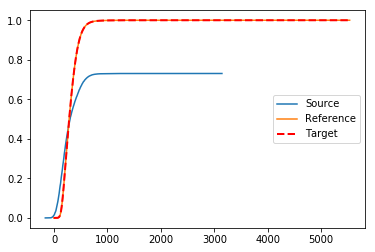

In [30]:
res_hist = hist_match_and_plot_old(sr_source_1.blue.isel(time=3).values, sr_template.blue_mean.values)

what needs to happen:

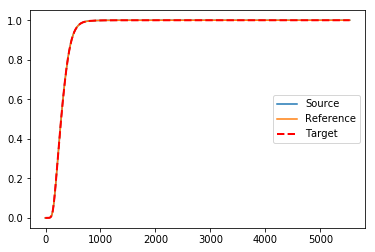

array([[ 193.63540877,  193.63540877,  125.01367951, ...,  240.35608151,
         240.35608151,  205.82111841],
       [ 157.13537536,  140.7842067 ,  157.13537536, ...,  240.35608151,
         239.32451328,  205.82111841],
       [ 193.63540877,  176.1919071 ,  157.13537536, ...,  223.09737789,
         223.09737789,  239.32451328],
       ...,
       [ 414.20837696,  414.20816754,  414.21005236, ...,  416.10992757,
         416.10971453,  416.10950149],
       [ 416.10928845,  416.10907542,  416.10886238, ...,  415.30961621,
         415.3094006 ,  415.30422596],
       [ 415.3113411 ,  415.30401035,  415.30120742, ...,  407.00868161,
         483.70743677, 5532.        ]])

In [31]:
hist_match_and_plot_old(res_hist, sr_template.blue_mean.values)

### Execution for every band of source

In [31]:
import time

In [32]:
band_list_source = list(sr_source_1.data_vars)

In [37]:
#210.48 secs
xr_ds = xr.Dataset({}, attrs = sr_source_1.attrs)
start = time.time()
for k in range(0, len(band_list_source)):
    band = band_list_source[k]
    xr_ds[band] = call_hist_match(sr_source_1,
                                  sr_template[band + '_mean'].values, 
                                  band, 
                                  sr_source_1.dims['time'])
end = time.time()
print(end - start)

In [33]:
#209.00 secs
xr_ds = xr.Dataset({}, attrs = sr_source_1.attrs)
start = time.time()
for k in range(0, len(band_list_source)):
    band = band_list_source[k]
    xr_ds[band] = call_hist_match_v2(sr_source_1,
                                  sr_template[band + '_mean'].values, 
                                  band, 
                                  sr_source_1.dims['time'])
end = time.time()
print(end - start)

In [34]:
xr_ds

<xarray.Dataset>
Dimensions:  (time: 7, x: 1667, y: 1667)
Coordinates:
  * y        (y) float64 1.527e+06 1.526e+06 1.526e+06 ... 1.477e+06 1.477e+06
  * x        (x) float64 2.027e+06 2.027e+06 2.027e+06 ... 2.077e+06 2.077e+06
  * time     (time) datetime64[ns] 1995-02-06T16:46:48 ... 1996-11-23T16:56:17
Data variables:
    blue     (time, y, x) float64 203.9 179.9 156.7 134.2 ... 336.0 272.4 203.9
    green    (time, y, x) float64 242.2 242.2 242.2 242.2 ... 495.3 452.0 383.4
    red      (time, y, x) float64 205.1 205.1 205.1 205.1 ... 559.9 487.2 452.1
    nir      (time, y, x) float64 843.1 843.1 843.1 ... 1.872e+03 1.93e+03
    swir1    (time, y, x) float64 731.4 731.4 731.4 ... 1.707e+03 1.482e+03
    swir2    (time, y, x) float64 347.2 419.5 347.2 ... 1.145e+03 977.1 776.3
Attributes:
    geobox:   GeoBox(Geometry({'type': 'Polygon', 'coordinates': [[(-106.7330...
    crs:      PROJCS["unnamed",GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS8...

In [35]:
xr_ds_chunk = xr_ds.chunk({'x': 600, 'y': 600})

In [36]:
xr_ds_chunk

<xarray.Dataset>
Dimensions:  (time: 7, x: 1667, y: 1667)
Coordinates:
  * y        (y) float64 1.527e+06 1.526e+06 1.526e+06 ... 1.477e+06 1.477e+06
  * x        (x) float64 2.027e+06 2.027e+06 2.027e+06 ... 2.077e+06 2.077e+06
  * time     (time) datetime64[ns] 1995-02-06T16:46:48 ... 1996-11-23T16:56:17
Data variables:
    blue     (time, y, x) float64 dask.array<shape=(7, 1667, 1667), chunksize=(7, 600, 600)>
    green    (time, y, x) float64 dask.array<shape=(7, 1667, 1667), chunksize=(7, 600, 600)>
    red      (time, y, x) float64 dask.array<shape=(7, 1667, 1667), chunksize=(7, 600, 600)>
    nir      (time, y, x) float64 dask.array<shape=(7, 1667, 1667), chunksize=(7, 600, 600)>
    swir1    (time, y, x) float64 dask.array<shape=(7, 1667, 1667), chunksize=(7, 600, 600)>
    swir2    (time, y, x) float64 dask.array<shape=(7, 1667, 1667), chunksize=(7, 600, 600)>
Attributes:
    geobox:   GeoBox(Geometry({'type': 'Polygon', 'coordinates': [[(-106.7330...
    crs:      PROJCS["unn

## E) Checking results for a few values

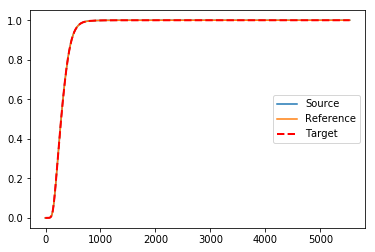

array([[ 193.63540877,  193.63540877,  125.01367951, ...,  240.35608151,
         240.35608151,  205.82111841],
       [ 157.13537536,  140.7842067 ,  157.13537536, ...,  240.35608151,
         239.32451328,  205.82111841],
       [ 193.63540877,  176.1919071 ,  157.13537536, ...,  223.09737789,
         223.09737789,  239.32451328],
       ...,
       [ 414.20837696,  414.20816754,  414.21005236, ...,  416.10992757,
         416.10971453,  416.10950149],
       [ 416.10928845,  416.10907542,  416.10886238, ...,  415.30961621,
         415.3094006 ,  415.30422596],
       [ 415.3113411 ,  415.30401035,  415.30120742, ...,  407.00868161,
         483.70743677, 5532.        ]])

In [35]:
hist_match_and_plot_old(xr_ds.blue.isel(time=3).values, sr_template.blue_mean.values)

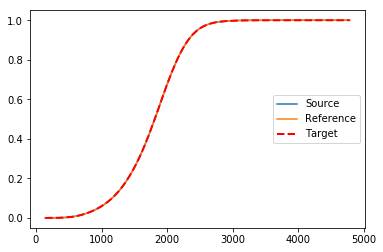

array([[1677.44896194, 1585.13756878, 1512.09955257, ..., 1669.42501113,
        1552.55561526, 1435.23111979],
       [1700.46983857, 1561.35557873, 1488.07398976, ..., 1714.81092058,
        1600.70818859, 1552.55561526],
       [1723.94442157, 1677.44896194, 1654.71502836, ..., 1646.11186288,
        1623.04726599, 1600.70818859],
       ...,
       [2181.35827187, 2181.35879874, 2181.35932561, ..., 2180.29117797,
        2180.29168791, 2180.29219786],
       [2180.2927078 , 2180.29321775, 2180.29372769, ..., 2182.73785901,
        2182.7383812 , 2182.73890339],
       [2182.73942559, 2182.73994778, 2182.74046997, ..., 2245.53836478,
        2347.48273026, 4788.        ]])

In [36]:
hist_match_and_plot_old(xr_ds.nir.isel(time=3).values, sr_template.nir_mean.values)

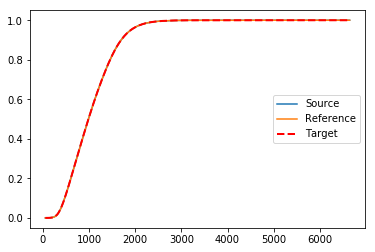

array([[ 734.63852243,  734.63852243,  605.32622505, ..., 1722.2972973 ,
        1288.56899696,  926.08831522],
       [ 694.22654155,  524.44558824,  375.5457294 , ..., 1686.86231039,
        1329.27478754, 1175.40333872],
       [ 776.07347505,  488.47621483,  488.47621483, ..., 1686.86231039,
        1329.27478754, 1215.21250662],
       ...,
       [ 673.39294118,  634.86595174,  758.05483727, ..., 1020.13687436,
        1144.57233035, 1522.84808144],
       [ 580.62690005,  503.30263789,  634.86595174, ..., 1144.57233035,
        1060.99950421,  896.21128799],
       [ 547.60670444,  580.62690005,  634.86595174, ..., 1144.57233035,
         977.07183099,  776.25462107]])

In [37]:
hist_match_and_plot_old(xr_ds.swir2.isel(time=6).values, sr_template.swir2_mean.values)

## G) Previous tests

In [64]:
res = call_hist_match(sr_source_1,sr_template.blue_mean.values, 'blue', sr_source_1.dims['time'])

In [62]:
res

<xarray.DataArray (time: 7, y: 1667, x: 1667)>
array([[[203.87446 , 179.884234, ..., 381.992207, 298.051397],
        [179.884234, 179.884234, ..., 402.161035, 320.928665],
        ...,
        [315.401977, 315.401977, ..., 323.626978, 301.096721],
        [337.252047, 358.005002, ..., 277.425577, 253.848491]],

       [[184.370611, 163.194026, ..., 326.269359, 326.269359],
        [204.081296, 163.194026, ..., 393.178646, 343.891766],
        ...,
        [142.39411 , 123.888219, ..., 290.092463, 229.826119],
        [161.390068, 141.481092, ..., 229.826119, 249.662149]],

       ...,

       [[266.566181, 199.286097, ..., 440.774848, 358.668536],
        [244.60809 , 157.864351, ..., 480.959985, 440.774848],
        ...,
        [155.676793, 175.417579, ..., 379.52002 , 289.282203],
        [135.937167, 175.417579, ..., 247.793485, 247.793485]],

       [[272.417706, 272.417706, ..., 337.875485, 251.422948],
        [295.077417, 248.353879, ..., 337.875485, 316.402685],
        ...,


In [63]:
res.isel(time=0)

<xarray.DataArray (y: 1667, x: 1667)>
array([[203.87446 , 179.884234, 156.748839, ..., 402.161035, 381.992207,
        298.051397],
       [179.884234, 179.884234, 179.884234, ..., 443.530926, 402.161035,
        320.928665],
       [156.748839, 156.748839, 156.748839, ..., 443.530926, 402.161035,
        362.386501],
       ...,
       [337.252047, 378.491281, 378.491281, ..., 301.096721, 323.626978,
        404.141462],
       [315.401977, 315.401977, 358.005002, ..., 323.626978, 323.626978,
        301.096721],
       [337.252047, 358.005002, 358.005002, ..., 344.325665, 277.425577,
        253.848491]])
Coordinates:
  * y        (y) float64 1.527e+06 1.526e+06 1.526e+06 ... 1.477e+06 1.477e+06
  * x        (x) float64 2.027e+06 2.027e+06 2.027e+06 ... 2.077e+06 2.077e+06
    time     datetime64[ns] 1995-02-06T16:46:48
Attributes:
    units:    reflectance
    nodata:   -9999
    crs:      PROJCS["unnamed",GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS8...

In [33]:
res.isel(time=6)

<xarray.DataArray (y: 1667, x: 1667)>
array([[272.417706, 272.417706, 272.417706, ..., 420.671711, 337.875485,
        251.422948],
       [295.077417, 248.353879, 225.368515, ..., 440.599262, 337.875485,
        316.402685],
       [295.077417, 225.368515, 225.368515, ..., 440.599262, 360.038098,
        337.875485],
       ...,
       [153.395218, 110.12021 , 175.193199, ..., 272.417706, 293.576905,
        398.726279],
       [131.404059,  88.381443, 175.193199, ..., 293.576905, 293.576905,
        272.417706],
       [110.770079, 130.357727, 175.193199, ..., 335.974237, 272.417706,
        203.921999]])
Coordinates:
  * y        (y) float64 1.527e+06 1.526e+06 1.526e+06 ... 1.477e+06 1.477e+06
  * x        (x) float64 2.027e+06 2.027e+06 2.027e+06 ... 2.077e+06 2.077e+06
    time     datetime64[ns] 1996-11-23T16:56:17

checking result:

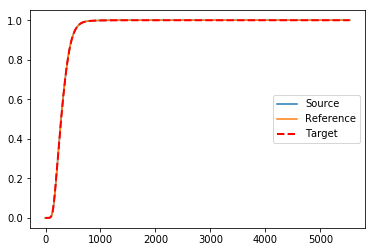

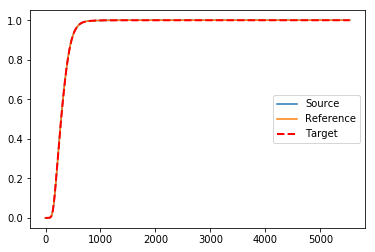

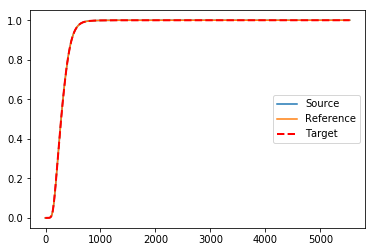

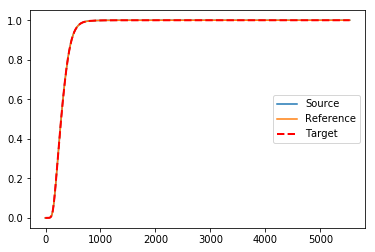

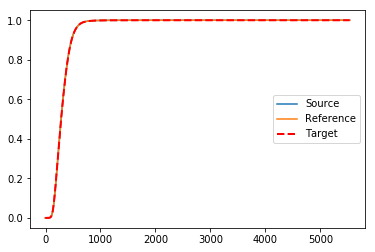

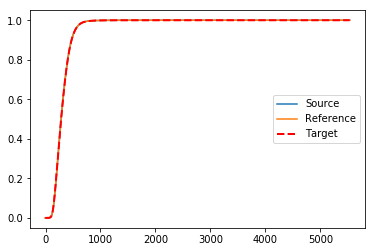

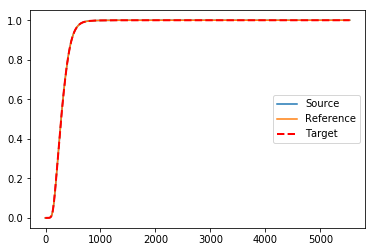

[array([[203.87445979, 179.88423387, 156.74883917, ..., 402.16103495,
         381.99220735, 298.05139733],
        [179.88423387, 179.88423387, 179.88423387, ..., 443.53092647,
         402.16103495, 320.92866458],
        [156.74883917, 156.74883917, 156.74883917, ..., 443.53092647,
         402.16103495, 362.38650116],
        ...,
        [337.25204653, 378.49128102, 378.49128102, ..., 301.09672089,
         323.62697785, 404.14146151],
        [315.40197736, 315.40197736, 358.00500152, ..., 323.62697785,
         323.62697785, 301.09672089],
        [337.25204653, 358.00500152, 358.00500152, ..., 344.32566499,
         277.42557701, 253.84849147]]),
 array([[184.37061133, 163.19402601, 184.37061133, ..., 376.54475874,
         326.26935892, 326.26935892],
        [204.08129578, 163.19402601, 204.08129578, ..., 428.36408335,
         393.17864554, 343.89176636],
        [184.37061133, 163.19402601, 184.37061133, ..., 428.36408335,
         410.48449773, 343.89176636],
        ...,


In [65]:
[hist_match_and_plot_old(res.isel(time=k).values, sr_template.blue_mean.values) for k in range(0,7)]

In [46]:
sr_source_1.blue.data

dask.array<where, shape=(7, 1667, 1667), dtype=float64, chunksize=(7, 600, 600)>

Just some tests

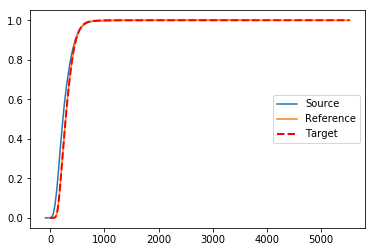

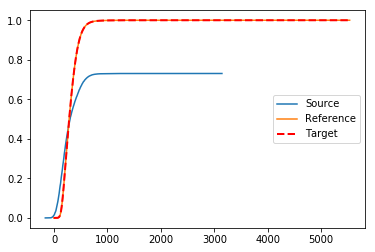

In [35]:
target_0 = xr.DataArray(hist_match_and_plot_old(sr_source_1.blue.isel(time=0).values, 
                                            sr_template.blue_mean.values), dims=['y','x'],
                        coords= {'y': sr_source_1.blue.coords['y'],
                                 'x': sr_source_1.blue.coords['x'],
                                 'time': sr_source_1.blue.coords['time'][0]},
                        name='dummy0')
target_3 = xr.DataArray(hist_match_and_plot_old(sr_source_1.blue.isel(time=3).values, 
                                            sr_template.blue_mean.values), dims=['y','x'],
                        coords= {'y': sr_source_1.blue.coords['y'],
                                 'x': sr_source_1.blue.coords['x'],
                                 'time': sr_source_1.blue.coords['time'][3]},
                        name='dummy3')


In [36]:
target_0

<xarray.DataArray 'dummy0' (y: 1667, x: 1667)>
array([[203.87446 , 179.884234, 156.748839, ..., 402.161035, 381.992207,
        298.051397],
       [179.884234, 179.884234, 179.884234, ..., 443.530926, 402.161035,
        320.928665],
       [156.748839, 156.748839, 156.748839, ..., 443.530926, 402.161035,
        362.386501],
       ...,
       [337.252047, 378.491281, 378.491281, ..., 301.096721, 323.626978,
        404.141462],
       [315.401977, 315.401977, 358.005002, ..., 323.626978, 323.626978,
        301.096721],
       [337.252047, 358.005002, 358.005002, ..., 344.325665, 277.425577,
        253.848491]])
Coordinates:
  * y        (y) float64 1.527e+06 1.526e+06 1.526e+06 ... 1.477e+06 1.477e+06
  * x        (x) float64 2.027e+06 2.027e+06 2.027e+06 ... 2.077e+06 2.077e+06
    time     datetime64[ns] 1995-02-06T16:46:48

In [37]:
target_3

<xarray.DataArray 'dummy3' (y: 1667, x: 1667)>
array([[ 193.635409,  193.635409,  125.01368 , ...,  240.356082,  240.356082,
         205.821118],
       [ 157.135375,  140.784207,  157.135375, ...,  240.356082,  239.324513,
         205.821118],
       [ 193.635409,  176.191907,  157.135375, ...,  223.097378,  223.097378,
         239.324513],
       ...,
       [ 414.208377,  414.208168,  414.210052, ...,  416.109928,  416.109715,
         416.109501],
       [ 416.109288,  416.109075,  416.108862, ...,  415.309616,  415.309401,
         415.304226],
       [ 415.311341,  415.30401 ,  415.301207, ...,  407.008682,  483.707437,
        5532.      ]])
Coordinates:
  * y        (y) float64 1.527e+06 1.526e+06 1.526e+06 ... 1.477e+06 1.477e+06
  * x        (x) float64 2.027e+06 2.027e+06 2.027e+06 ... 2.077e+06 2.077e+06
    time     datetime64[ns] 1996-01-24T16:39:02

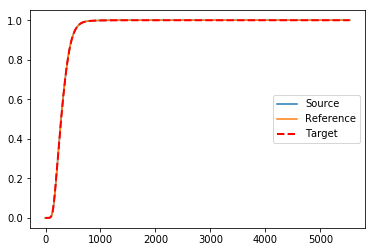

array([[203.87445979, 179.88423387, 156.74883917, ..., 402.16103495,
        381.99220735, 298.05139733],
       [179.88423387, 179.88423387, 179.88423387, ..., 443.53092647,
        402.16103495, 320.92866458],
       [156.74883917, 156.74883917, 156.74883917, ..., 443.53092647,
        402.16103495, 362.38650116],
       ...,
       [337.25204653, 378.49128102, 378.49128102, ..., 301.09672089,
        323.62697785, 404.14146151],
       [315.40197736, 315.40197736, 358.00500152, ..., 323.62697785,
        323.62697785, 301.09672089],
       [337.25204653, 358.00500152, 358.00500152, ..., 344.32566499,
        277.42557701, 253.84849147]])

In [38]:
hist_match_and_plot_old(target_0.values, sr_template.blue_mean.values)

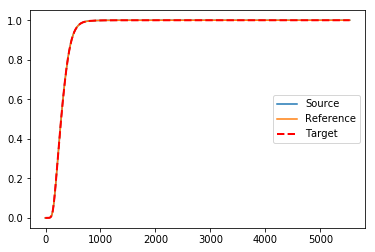

array([[ 193.63540877,  193.63540877,  125.01367951, ...,  240.35608151,
         240.35608151,  205.82111841],
       [ 157.13537536,  140.7842067 ,  157.13537536, ...,  240.35608151,
         239.32451328,  205.82111841],
       [ 193.63540877,  176.1919071 ,  157.13537536, ...,  223.09737789,
         223.09737789,  239.32451328],
       ...,
       [ 414.20837696,  414.20816754,  414.21005236, ...,  416.10992757,
         416.10971453,  416.10950149],
       [ 416.10928845,  416.10907542,  416.10886238, ...,  415.30961621,
         415.3094006 ,  415.30422596],
       [ 415.3113411 ,  415.30401035,  415.30120742, ...,  407.00868161,
         483.70743677, 5532.        ]])

In [39]:
hist_match_and_plot_old(target_3.values, sr_template.blue_mean.values)

In [40]:
xr.concat([target_0, target_3],dim='time')

<xarray.DataArray 'dummy0' (time: 2, y: 1667, x: 1667)>
array([[[ 203.87446 ,  179.884234, ...,  381.992207,  298.051397],
        [ 179.884234,  179.884234, ...,  402.161035,  320.928665],
        ...,
        [ 315.401977,  315.401977, ...,  323.626978,  301.096721],
        [ 337.252047,  358.005002, ...,  277.425577,  253.848491]],

       [[ 193.635409,  193.635409, ...,  240.356082,  205.821118],
        [ 157.135375,  140.784207, ...,  239.324513,  205.821118],
        ...,
        [ 416.109288,  416.109075, ...,  415.309401,  415.304226],
        [ 415.311341,  415.30401 , ...,  483.707437, 5532.      ]]])
Coordinates:
  * y        (y) float64 1.527e+06 1.526e+06 1.526e+06 ... 1.477e+06 1.477e+06
  * x        (x) float64 2.027e+06 2.027e+06 2.027e+06 ... 2.077e+06 2.077e+06
  * time     (time) datetime64[ns] 1995-02-06T16:46:48 1996-01-24T16:39:02

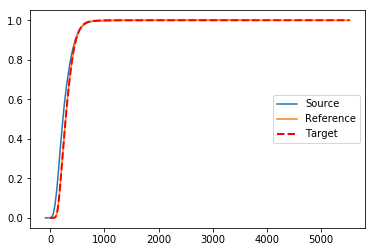

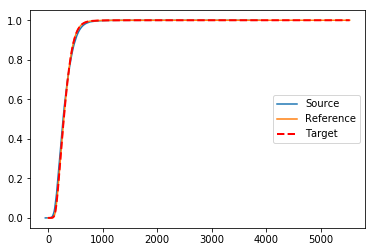

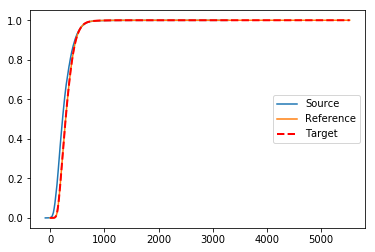

In [65]:
aux_l_0 = xr.DataArray(hist_match_and_plot_old(sr_source_1.blue.isel(time=0).values,
                                                       sr_template.blue_mean.values),
                               dims=['y','x'],
                               coords= {'y': sr_source_1.blue.coords['y'],
                                        'x': sr_source_1.blue.coords['x'],
                                        'time': sr_source_1.blue.coords['time'][0]})

aux_l = [xr.DataArray(hist_match_and_plot_old(sr_source_1.blue.isel(time=k).values, 
                                              sr_template.blue_mean.values), 
                      dims=['y','x'],
                      coords= {'y': sr_source_1.blue.coords['y'],
                               'x': sr_source_1.blue.coords['x'],
                               'time': sr_source_1.blue.coords['time'][k]}) for k in range(1,3)]


In [66]:
target_DA_dummy = xr.concat(aux_l,dim='time')

In [67]:
target_DA_dummy

<xarray.DataArray (time: 2, y: 1667, x: 1667)>
array([[[184.370611, 163.194026, ..., 326.269359, 326.269359],
        [204.081296, 163.194026, ..., 393.178646, 343.891766],
        ...,
        [142.39411 , 123.888219, ..., 290.092463, 229.826119],
        [161.390068, 141.481092, ..., 229.826119, 249.662149]],

       [[119.246088, 142.059072, ..., 354.74615 , 333.307482],
        [165.035465, 165.035465, ..., 375.182774, 375.182774],
        ...,
        [130.770634, 152.326065, ..., 334.010021, 287.044689],
        [107.473888, 152.326065, ..., 310.559303, 262.186431]]])
Coordinates:
  * y        (y) float64 1.527e+06 1.526e+06 1.526e+06 ... 1.477e+06 1.477e+06
  * x        (x) float64 2.027e+06 2.027e+06 2.027e+06 ... 2.077e+06 2.077e+06
  * time     (time) datetime64[ns] 1995-03-10T16:45:31 1995-11-21T16:34:45

In [68]:
xr.concat([aux_l_0, target_DA_dummy], dim='time')

<xarray.DataArray (y: 1667, x: 1667, time: 3)>
array([[[203.87446 , 184.370611, 119.246088],
        [179.884234, 163.194026, 142.059072],
        ...,
        [381.992207, 326.269359, 354.74615 ],
        [298.051397, 326.269359, 333.307482]],

       [[179.884234, 204.081296, 165.035465],
        [179.884234, 163.194026, 165.035465],
        ...,
        [402.161035, 393.178646, 375.182774],
        [320.928665, 343.891766, 375.182774]],

       ...,

       [[315.401977, 142.39411 , 130.770634],
        [315.401977, 123.888219, 152.326065],
        ...,
        [323.626978, 290.092463, 334.010021],
        [301.096721, 229.826119, 287.044689]],

       [[337.252047, 161.390068, 107.473888],
        [358.005002, 141.481092, 152.326065],
        ...,
        [277.425577, 229.826119, 310.559303],
        [253.848491, 249.662149, 262.186431]]])
Coordinates:
  * y        (y) float64 1.527e+06 1.526e+06 1.526e+06 ... 1.477e+06 1.477e+06
  * x        (x) float64 2.027e+06 2.027e+06 2.027e+